# Exercise
## Plotting
1. Use the sinewave, chirp ( linear, quadratic, logarithnic, concave)
    - How does the signal look? What is on y-axis and x-axis?
    - Discuss Resolution of the signal, range, sampling frequency
    - Listen to them - Can you hear them? why?

In [11]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

In [8]:
#sine wave
t = np.linspace(0,1,1000)
f = 20
y = np.sin(2*np.pi*f*t)

Text(0, 0.5, 'sin(2*pi*f*t)')

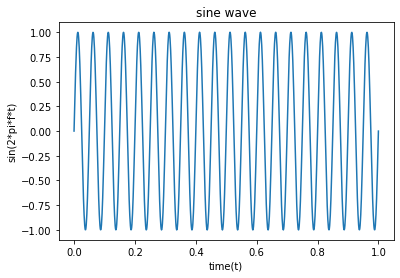

In [10]:
plt.plot(t,y)
plt.title("sine wave")
plt.xlabel("time(t)")
plt.ylabel("sin(2*pi*f*t)")

Text(0, 0.5, 'Amplitude')

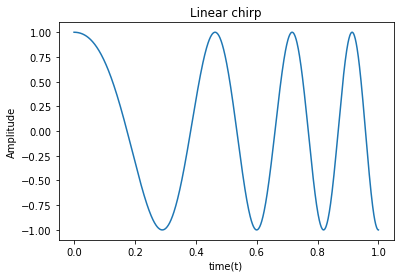

In [20]:
#chirp
y = sig.chirp(t, 1, .2, 2, method="linear")
plt.plot(t,y)
plt.title("Linear chirp")
plt.xlabel("time(t)")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

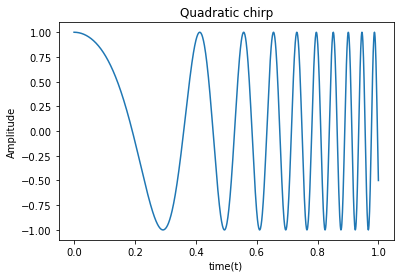

In [19]:
y = sig.chirp(t, 1, .2, 2, method="quadratic")
plt.plot(t,y)
plt.title("Quadratic chirp")
plt.xlabel("time(t)")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

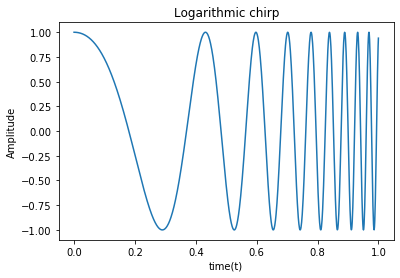

In [21]:
y = sig.chirp(t, 1, .2, 2, method="logarithmic")
plt.plot(t,y)
plt.title("Logarithmic chirp")
plt.xlabel("time(t)")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

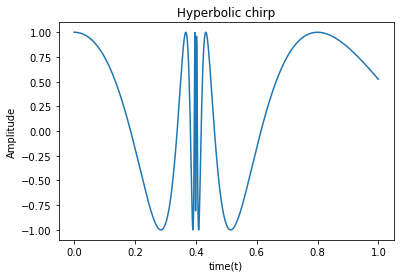

In [22]:
y = sig.chirp(t, 1, .2, 2, method="hyperbolic")
plt.plot(t,y)
plt.title("Hyperbolic chirp")
plt.xlabel("time(t)")
plt.ylabel("Amplitude")

## Frequency spectrum
2. Plot the spectra- Discuss their frequency content and relate to the auditory range of human hearing
3. Use the Hanning, rectangular and Hamming tapers to compute spectra
    - compare spectra between tapers
4. What is the samplng frequency in relation to Nyquist sampling theorem?

# Time-Frequency decomposition
5. Compute TFR using STFT, multitaper and wavelet decomposition
    - What time point elicits maximal frequency and is it comparable across methods?
    - Change the window sizes - has the frequency resolution changed?
    - How can you find out frequency resolution from the outputs?
    - Can you justify the change in frequency resolution?
    - Keeping window sizes fixed, can you double the frequency resolution? How?
    - Plot and show the results. Explain them.

# Filter design
6. Design a low-, high-, bandpass and band-reject butter worth filter
    - Use the "fdatool" in MATLAB or pyFDA in python
    - Filter settings
        - LPF - 100 Hz
        - HPF - 0.1 Hz, 1 Hz
        - BPF - 0.1-100 Hz, 1-100 HZ
        - BSP - 45-55 Hz
    - Change the order of the filter - how does the roll-off rate change? What is the relation between roll-off rate and order of the filter?
    - How do the passband/stopband ripple, stopband attenuation look like?
    - Sampling frequency - 1000 Hz
    - Chagne the order of the filter - how does the roll-off rate change?
    - How do the passband/stopband ripple, stopband attenuation look like?
    - Look at the phase response for each of the filters. What does it indicate? is it linear? Why is it important that it is linear? whatwould happen if the phase response of the filter is non-linear in the passband?
        

7. Phase responses
    - Compute the response of (i)forward, (ii) reverse and (iii) forward-reverse filter for a simple Gaussian signal train. Match it with the input signal and see how response changes with mode of filtering.
    - How can you perform a zero-phase filtering in this scenario?

# Bivariate spectral decomposition
8. Coherence
    - Generate a bivariate time series of two known common frequency contents
    - Calculate the mean-squared coherence and plot
    - How does it look? Have you got back the overlapping spectra?